# Model Selection

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

## Importing dataset

In [2]:
df = pd.read_csv("AirQuality.csv")

## EDA Steps

In [3]:
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833


In [4]:
df.shape

(1048, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             1040 non-null   object 
 1   City                1048 non-null   object 
 2   AQI Value           1048 non-null   int64  
 3   AQI Category        1048 non-null   object 
 4   CO AQI Value        1048 non-null   int64  
 5   CO AQI Category     1048 non-null   object 
 6   Ozone AQI Value     1048 non-null   int64  
 7   Ozone AQI Category  1048 non-null   object 
 8   NO2 AQI Value       1048 non-null   int64  
 9   NO2 AQI Category    1048 non-null   object 
 10  PM2.5 AQI Value     1048 non-null   int64  
 11  PM2.5 AQI Category  1048 non-null   object 
 12  lat                 1048 non-null   float64
 13  lng                 1048 non-null   float64
dtypes: float64(2), int64(5), object(7)
memory usage: 114.8+ KB


In [6]:
df.columns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category', 'lat', 'lng'],
      dtype='object')

In [7]:
df.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
count,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000
mean,62.774809,1.212786,30.725191,3.851145,59.432252,30.811904,-2.836124
std,49.553892,1.384713,22.869524,6.195076,48.370241,22.794833,72.161075
min,12.000000,0.000000,0.000000,0.000000,3.000000,-53.166700,-158.144500
25%,36.000000,1.000000,19.000000,0.000000,32.000000,18.723675,-74.314450
50%,50.500000,1.000000,28.000000,2.000000,50.000000,39.052100,5.020450
75%,70.250000,1.000000,35.000000,5.000000,69.000000,47.933075,37.342800
max,500.000000,27.000000,206.000000,91.000000,466.000000,69.408100,176.166700


In [8]:
df.describe(include=object)

,Country,City,AQI Category,CO AQI Category,Ozone AQI Category,NO2 AQI Category,PM2.5 AQI Category
count,1040,1048,1048,1048,1048,1048,1048
unique,113,919,6,1,5,2,6
top,United States of America,Middletown,Good,Good,Good,Good,Good
freq,246,10,524,1048,983,1046,533


# Preprocessing data

In [9]:
from sklearn.impute import SimpleImputer
# Check for missing values in the dataset
print(df.isnull().sum())

# If there are missing values, you can handle them based on your requirements.
# One option is to drop the rows with missing values:
df.dropna(inplace=True)

# Impute missing values
numerical_cols = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value', 'lat', 'lng']
categorical_cols = ['Country', 'City', 'AQI Category', 'CO AQI Category', 'Ozone AQI Category', 'NO2 AQI Category', 'PM2.5 AQI Category']

# Impute numerical columns with mean
numerical_imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])

# Impute categorical columns with mode
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

# Verify the updated dataset
print(df.head())

Country               8
City                  0
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
lat                   0
lng                   0
dtype: int64
              Country              City  AQI Value AQI Category  CO AQI Value  \
0  Russian Federation        Praskoveya       51.0     Moderate           1.0   
1              Brazil  Presidente Dutra       41.0         Good           1.0   
2              Brazil  Presidente Dutra       41.0         Good           1.0   
3               Italy   Priolo Gargallo       66.0     Moderate           1.0   
4              Poland         Przasnysz       34.0         Good           1.0   

  CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value  \
0            Good             36.0               Good            0.0   
1            Good   

In [10]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [11]:
# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
df['Country'] = label_encoder.fit_transform(df['Country'])
df['City'] = label_encoder.fit_transform(df['City'])
df['AQI Category'] = label_encoder.fit_transform(df['AQI Category'])
df['CO AQI Category'] = label_encoder.fit_transform(df['CO AQI Category'])
df['Ozone AQI Category'] = label_encoder.fit_transform(df['Ozone AQI Category'])
df['NO2 AQI Category'] = label_encoder.fit_transform(df['NO2 AQI Category'])
df['PM2.5 AQI Category'] = label_encoder.fit_transform(df['PM2.5 AQI Category'])


## Standardize the data

In [12]:
# Standardize numerical features using StandardScaler
scaler = StandardScaler()
# numerical_cols = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value', 'lat', 'lng']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [13]:
# Check the updated dataset
print(df.head())


   Country  City  AQI Value  AQI Category  CO AQI Value  CO AQI Category  \
0       86   751  -0.237434             2     -0.155171                0   
1       12   753  -0.439061             0     -0.155171                0   
2       12   753  -0.439061             0     -0.155171                0   
3       50   757   0.065005             2     -0.155171                0   
4       80   759  -0.580199             0     -0.155171                0   

   Ozone AQI Value  Ozone AQI Category  NO2 AQI Value  NO2 AQI Category  \
0         0.231391                   0      -0.622555                 0   
1        -1.121045                   0      -0.461536                 0   
2        -1.121045                   0      -0.461536                 0   
3         0.362272                   0      -0.300517                 0   
4         0.144137                   0      -0.622555                 0   

   PM2.5 AQI Value  PM2.5 AQI Category       lat       lng  
0        -0.174743             

# Split the data

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
# Assuming 'df' is your preprocessed DataFrame
X = df.drop('AQI Category', axis=1)  # Features (all columns except the target variable)
y = df['AQI Category']  # Target variable

In [16]:
# Apply Min-Max scaling to normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y, 
                                                    test_size=0.30, 
                                                    random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (728, 13) (728,)
Test set: (312, 13) (312,)


# Decesion tree

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score, jaccard_score

dt = DecisionTreeClassifier()

# Define the parameter grid to search
param_grid = {'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best estimator and its predictions
best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(X_test)

# Calculate evaluation metrics
a1 = accuracy_score(y_test, y_pred)
b1 = f1_score(y_test, y_pred, average='micro')
c1 = jaccard_score(y_test, y_pred, average='micro')

# Print the evaluation results
print("-----------------For the Decision Tree Algorithm ----------")
print("Best Estimator:", best_estimator)

-----------------For the Decision Tree Algorithm ----------
Best Estimator: DecisionTreeClassifier(max_depth=5)


# SVM

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svm = SVC()

# Define the parameter grid to search
param_grid = {'C': [1, 10, 100], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf']}

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best estimator and its predictions
best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(X_test)

# Calculate evaluation metrics
a2 = accuracy_score(y_test, y_pred)
b2 = f1_score(y_test, y_pred, average='micro')
c2 = jaccard_score(y_test, y_pred, average='micro')

# Print the evaluation results
print("-----------------For the SVM Algorithm ----------")
print("Best Estimator:", best_estimator)


-----------------For the SVM Algorithm ----------
Best Estimator: SVC(C=1, kernel='linear')


# Logistic Regression

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
# Train your model on the training set
# Define the parameter grid to search
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}

# Perform grid search with cross-validation
grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best estimator and its predictions
best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(X_test)

# Calculate evaluation metrics
a3 = accuracy_score(y_test, y_pred)
b3 = f1_score(y_test, y_pred, average='micro')
c3 = jaccard_score(y_test, y_pred, average='micro')

# Print the evaluation results
print("-----------------For the Logistic Regression Algorithm ----------")
print("Best Estimator:", best_estimator)


C:\Users\lenov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lenov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

-----------------For the Logistic Regression Algorithm ----------
Best Estimator: LogisticRegression(C=0.1)


C:\Users\lenov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lenov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

# Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, jaccard_score
rf = RandomForestClassifier()

# Define the parameter grid to search
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best estimator and its predictions
best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(X_test)

# Calculate evaluation metrics
a4 = accuracy_score(y_test, y_pred)
b4 = f1_score(y_test, y_pred, average='micro')
c4 = jaccard_score(y_test, y_pred, average='micro')

# Print the evaluation results
print("-----------------For the Random Forest Algorithm ----------")
print("Best Estimator:", best_estimator)


-----------------For the Random Forest Algorithm ----------
Best Estimator: RandomForestClassifier(n_estimators=300)


## Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB


# Create the Gaussian Naive Bayes object
nb = GaussianNB()

# Train the model on the training set
nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb.predict(X_test)

# Calculate evaluation metrics
a5 = accuracy_score(y_test, y_pred)
b5 = f1_score(y_test, y_pred, average='micro')
c5 = jaccard_score(y_test, y_pred, average='micro')




In [23]:
result_df=pd.DataFrame({'Model':['Decision Tree ', 'SVM','Logistic Regression',
                                'Random Forest','Naive Bayes'],
                        'Accuracy Score':[a1,a2,a3,a4,a5],
                        'F1 Score': [b1,b2,b3,b4,b5],
                        'Jaccard Score':[c1,c2,c3,c4,c5]})

In [24]:
print(result_df)

                 Model  Accuracy Score  F1 Score  Jaccard Score
0       Decision Tree         0.996795  0.996795       0.993610
1                  SVM        0.990385  0.990385       0.980952
2  Logistic Regression        0.865385  0.865385       0.762712
3        Random Forest        0.996795  0.996795       0.993610
4          Naive Bayes        0.993590  0.993590       0.987261


C:\Users\lenov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lenov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

DT: 0.979414 (0.015333)
SVM: 0.979414 (0.015333)
LR: 0.979414 (0.015333)
RF: 0.979414 (0.015333)
NB: 0.979414 (0.015333)


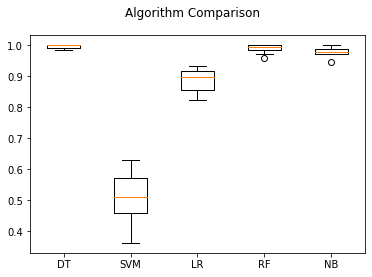

In [26]:
from sklearn import model_selection 
import matplotlib.pyplot as plt
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('DT', dt ))
models.append(('SVM', svm))
models.append(('LR', lr))
models.append(('RF', rf))
models.append(('NB', nb))
 # evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name,model in models:
    kfold = model_selection.KFold(n_splits=10, 
                                random_state=seed,
                                shuffle=True)
    cv_results = model_selection.cross_val_score(model,
                                               X_train,
                                               y_train,
                                               cv=kfold, 
                                               scoring=scoring)
    results.append(cv_results)
    names.append(name)
for name,model in models:
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [32]:
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

classifiers = [dt, svm, lr, rf, nb]
model_names = ['Decision Tree', 'SVM', 'Logistic Regression', 'Random Forest', 'Naive Bayes']
result_table = pd.DataFrame(columns=['Model', 'Class', 'FPR', 'TPR', 'AUC'])

# Get the number of unique classes in the target variable
num_classes = len(np.unique(y_train))

# Iterate over each class
for class_idx in range(num_classes):
    y_train_binary = np.where(y_train == class_idx, 1, -1)
    y_test_binary = np.where(y_test == class_idx, 1, -1)
    
    for model, name in zip(classifiers, model_names):
        model.fit(X_train, y_train_binary)
        
        if hasattr(model, 'predict_proba'):
            # Use predict_proba if available
            y_scores = model.predict_proba(X_test)[:, 1]
        else:
            # Use decision_function if predict_proba is not available
            y_scores = model.decision_function(X_test)
            
        fpr, tpr, _ = roc_curve(y_test_binary, y_scores)
        auc = roc_auc_score(y_test_binary, y_scores)

        result_table = result_table.append({'Model': name, 'Class': class_idx, 'FPR': fpr, 'TPR': tpr, 'AUC': auc}, ignore_index=True)

print(result_table)


C:\Users\lenov\AppData\Local\Temp\ipykernel_392\1689984763.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'Model': name, 'Class': class_idx, 'FPR': fpr, 'TPR': tpr, 'AUC': auc}, ignore_index=True)
C:\Users\lenov\AppData\Local\Temp\ipykernel_392\1689984763.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'Model': name, 'Class': class_idx, 'FPR': fpr, 'TPR': tpr, 'AUC': auc}, ignore_index=True)
C:\Users\lenov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

C:\Users\lenov\AppData\Local\Temp\ipykernel_392\1689984763.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'Model': name, 'Class': class_idx, 'FPR': fpr, 'TPR': tpr, 'AUC': auc}, ignore_index=True)
C:\Users\lenov\AppData\Local\Temp\ipykernel_392\1689984763.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'Model': name, 'Class': class_idx, 'FPR': fpr, 'TPR': tpr, 'AUC': auc}, ignore_index=True)
C:\Users\lenov\AppData\Local\Temp\ipykernel_392\1689984763.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'Model': name, 'Class': class_idx, 'FPR': fpr, 'TPR': tpr, 'AUC': auc}, ignore_index=True)
C:\Users\lenov\A

                  Model Class  \
0         Decision Tree     0   
1                   SVM     0   
2   Logistic Regression     0   
3         Random Forest     0   
4           Naive Bayes     0   
5         Decision Tree     1   
6                   SVM     1   
7   Logistic Regression     1   
8         Random Forest     1   
9           Naive Bayes     1   
10        Decision Tree     2   
11                  SVM     2   
12  Logistic Regression     2   
13        Random Forest     2   
14          Naive Bayes     2   
15        Decision Tree     3   
16                  SVM     3   
17  Logistic Regression     3   
18        Random Forest     3   
19          Naive Bayes     3   
20        Decision Tree     4   
21                  SVM     4   
22  Logistic Regression     4   
23        Random Forest     4   
24          Naive Bayes     4   
25        Decision Tree     5   
26                  SVM     5   
27  Logistic Regression     5   
28        Random Forest     5   
29        

C:\Users\lenov\AppData\Local\Temp\ipykernel_392\1689984763.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'Model': name, 'Class': class_idx, 'FPR': fpr, 'TPR': tpr, 'AUC': auc}, ignore_index=True)
C:\Users\lenov\AppData\Local\Temp\ipykernel_392\1689984763.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'Model': name, 'Class': class_idx, 'FPR': fpr, 'TPR': tpr, 'AUC': auc}, ignore_index=True)


C:\Users\lenov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


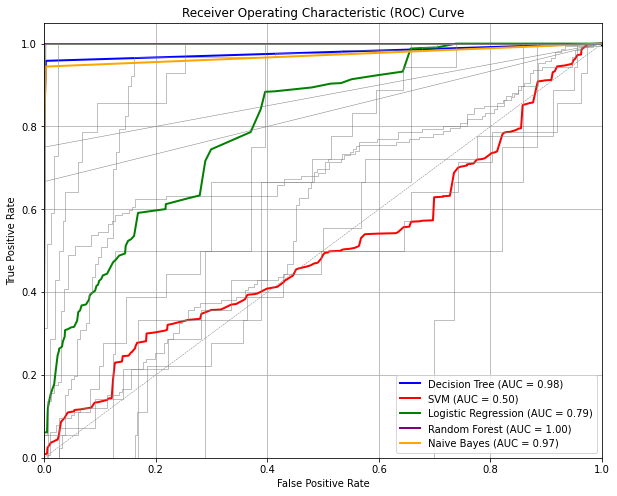

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Convert the multiclass labels into binary format
y_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_bin.shape[1]

# Instantiate the classifiers and make a list
classifiers = [dt, svm, lr, rf, nb]
model_names = ['Decision Tree', 'SVM', 'Logistic Regression',
               'Random Forest', 'Naive Bayes']

# Initialize an empty dictionary to store the results
roc_results = {}

# Iterate over the classifiers
for classifier, model_name in zip(classifiers, model_names):
    model = classifier.fit(X_train, y_train)
    if model_name == 'SVM':
        y_scores = model.decision_function(X_test)
    else:
        y_scores = model.predict_proba(X_test)
    
    # Compute the ROC curve and ROC AUC score for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_scores[:, i])
        roc_auc[i] = roc_auc_score(y_bin[:, i], y_scores[:, i])
    
    # Compute the macro-average ROC curve and ROC AUC score
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    
    mean_tpr /= n_classes
    
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = roc_auc_score(y_bin, y_scores, average='macro')
    
    roc_results[model_name] = {
        'fpr': fpr,
        'tpr': tpr,
        'roc_auc': roc_auc
    }

# Plot the ROC curves for each classifier
plt.figure(figsize=(10, 8))

colors = cycle(['blue', 'red', 'green', 'purple', 'orange'])
for model_name, color in zip(model_names, colors):
    fpr = roc_results[model_name]['fpr']
    tpr = roc_results[model_name]['tpr']
    roc_auc = roc_results[model_name]['roc_auc']
    
    plt.plot(fpr['macro'], tpr['macro'],
             label=f"{model_name} (AUC = {roc_auc['macro']:.2f})",
             color=color, linewidth=2)
    
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], color='gray', linewidth=0.5)
        plt.scatter(fpr[i][-1], tpr[i][-1], color='black', s=5)
    
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=0.5)
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
